In [107]:
import requests

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [109]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Gather Data

## Import Image Predictions Data 

In [110]:
image_pred = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [111]:
image_pred.status_code

200

Save image predictions data to a tsv file.

In [112]:
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(image_pred.content)

## Import Tweet Info

In [113]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [114]:
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)

In [115]:
df_ta = pd.read_csv('twitter-archive-enhanced.csv')

In [116]:
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [481]:
tweet_ids = df_ta.tweet_id.values
len(tweet_ids)

2356

`Note`: Initial attempt at downloading tweet data failed after 900 ID's, due to rate limit. Modified tweepy api to "wait on rate limit". Then resumed downloading. This time it was successful.

In [482]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 1800
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'a') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids[900:]: # Initial try: twitter rate limit mechanism limits each session to 900
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1801: 758740312047005698
Success
1802: 758474966123810816
Success
1803: 758467244762497024
Success
1804: 758405701903519748
Success
1805: 758355060040593408
Success
1806: 758099635764359168
Success
1807: 758041019896193024
Success
1808: 757741869644341248
Success
1809: 757729163776290825
Success
1810: 757725642876129280
Success
1811: 757611664640446465
Success
1812: 757597904299253760
Success
1813: 757596066325864448
Success
1814: 757400162377592832
Success
1815: 757393109802180609
Success
1816: 757354760399941633
Success
1817: 756998049151549440
Success
1818: 756939218950160384


KeyboardInterrupt: 

`Results`: only 2 ID's are missing. {754011816964026368: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 680055455951884288: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}

## Load Data Files

In [119]:
df_ta = pd.read_csv('twitter-archive-enhanced.csv')
df_ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [120]:
df_ta.tweet_id.nunique()

2356

In [477]:
df_ip = pd.read_csv('image_predictions.tsv',sep = '\t')
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [122]:
df_ip.tweet_id.nunique()

2075

In [ ]:
df_tj = pd.read_json('tweet_json.txt', lines = True)

# Assess and Clean Data

## Assess - Data Frames Structure

In [479]:
df_tj.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_tj.info()

In [ ]:
df_tj.describe()

In [480]:
df_tj[df_tj['id']!=df_tj['id_str'].astype('int64')]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
11,2017-07-25 16:11:53+00:00,889880896479866881,889880896479866880,This is Bruno. He is a service shark. Only get...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 889880888800096258, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,2015-11-16 00:49:46+00:00,666055525042405380,666055525042405376,Here is a Siberian heavily armored polar bear ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2327,2015-11-16 00:30:50+00:00,666050758794694657,666050758794694656,This is a truly beautiful English Wilson Staff...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2328,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2330,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


>Tidiness issue #1: information about the tweets are in 3 files, they need to be combined into 1 data frame. Each row in the combined data frame needs to contain information from all 3 sources.

>Quality issue #1: 825 entries in tweet_json.txt have 'id' and 'id_str' mismatch. Also 'id_str' is int type, not str type.

## Clean - Data Frames Structure

### Define
* Combine all 3 files into 1 data frame, keep only interested columns in tweet_json.txt

* The tweet_json.txt id_str issue dosen't need to be addressed, since the column will not be retained in the combined data frame.

### Code and Test

Identify columns of interest in df_tj

In [125]:
# select to keep only retweet_cnt and favorite_cnt
df_tj.drop(columns = df_tj.columns.difference(['id', 'retweet_count', 'favorite_count']), inplace = True)

## Add retweet count and favorit count to the data frame

In [234]:
df = pd.merge(df_ta, df_tj, left_on = 'tweet_id', right_on = 'id')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,892420643555336193,7847,36815
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,892177421306343426,5812,31697
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,891815181378084864,3847,23875
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,891689557279858688,8013,40140
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,891327558926688256,8657,38337


In [235]:
df.drop(columns = 'id', inplace = True)

## Combine with dog image predictions data
Only keep original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets
Goal: assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

In [236]:
# combine with image dataset, only keep those that have images.
df = pd.merge(df, df_ip, how = 'inner', on = 'tweet_id' )
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
retweet_count                 2061 

In [238]:
#save combined dataset to a file
df.to_csv('combine_tweet_data.csv', index = False)

## Assess - Data Values

In [133]:
df = pd.read_csv('combine_tweet_data.csv')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
retweet_count                 2061 

In [505]:
df.retweeted_status_id.value_counts()

7.076109e+17    1
7.827226e+17    1
8.224891e+17    1
7.638376e+17    1
8.327664e+17    1
               ..
7.848260e+17    1
8.482894e+17    1
6.675484e+17    1
7.902771e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 74, dtype: int64

In [135]:
df.rating_denominator.value_counts()

10     2043
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [136]:
df[df.rating_denominator!=10].shape[0]

18

In [137]:
df.rating_numerator.value_counts()

12      472
10      428
11      413
13      275
9       151
8        95
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
0         2
80        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
143       1
420       1
1776      1
15        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [138]:
df[df.rating_numerator == 26] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1440,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [139]:
df.loc[1440].text

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

The numerator/denominator is 11.26/10

In [140]:
df[df.rating_numerator == 27] # it's 11.27/10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
603,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,...,1,clumber,0.946718,True,cocker_spaniel,0.01595,True,Lhasa,0.006519,True


In [141]:
df.loc[603].text

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

The numerator/denominator is 11.27/10

In [142]:
df[df.rating_numerator == 75] # it's 9.75 / 10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
548,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [143]:
df.loc[548].text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

The numerator/denominator is 9.75/10

In [144]:
df[df.rating_denominator == 150] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
724,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True


In [145]:
df.loc[724].text

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

It's multiple dogs, 165/150

In [146]:
df[df.rating_numerator == 1776] # represents year of US independence

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
791,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [147]:
df[df.rating_numerator == 420]  # it's Snoop Dog, the person

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1783,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,...,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False


In [148]:
df.name.value_counts().head(20)

None       575
a           55
Charlie     10
Penny       10
Cooper      10
Oliver      10
Tucker      10
Lucy         9
Sadie        8
Winston      8
Bo           8
Lola         8
the          7
Toby         7
Daisy        7
an           7
Scout        6
Jax          6
Bella        6
Rusty        6
Name: name, dtype: int64

In [149]:
sorted (df.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bluebert',
 'Bo',
 '

Dog names: a sorted unique values list of dog names show that there are names that seem to be erroneous: 'a','actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'light', 'my', 'not',  'officially', 'one', 'quite', 'space', 'such', 'the', 'unacceptable', 'very'. 

> Data quality issues: <br> #2: 74 tweets are retweets <br> #3: 18 tweets have rating_denominator != 10 <br> #4: there are ~20 entries of rating_numerator with values > 20, while the rest are <= 14. <br> #5: Some dog names are mistaken

For issue #4, distribution of values greater than 14 suddenly drops dramatically, while the value ranges extend far, suggesting they are outlier data points. Detailed investigation reveals mistaken value extraction, or very large number due to multiple dogs in the same picture.

## Clean - Data Values

### Define
* Remove retweets
* Clean rating_denominator numbers != 10
* Clean rating_numerator numbers > 20 
* Replace mistaken dog names with Nan

### Code - Retweet, Rating Numerator & Denominator

In [150]:
#Remove retweets
df.drop(index = df[df['retweeted_status_id'].isna() == False].index, inplace = True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
doggo                         1987 non-null object
floofer                       1987 non-null object
pupper                        1987 non-null object
puppo                         1987 non-null object
retweet_count                 1987 non

In [152]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.987000e+03,2.300000e+01,2.300000e+01,0.0,0.0,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,7.356264e+17,6.978112e+17,4.196984e+09,NaN,NaN,12.280825,10.533971,2503.533971,8411.970307,1.203322,0.593317,1.344725e-01,6.037114e-02
std,6.739210e+16,4.359384e+16,0.000000e+00,NaN,NaN,41.570741,7.333532,4479.572143,12374.200684,0.561369,0.271959,1.005706e-01,5.091543e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,2.000000,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758218e+17,6.732411e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,560.000000,1807.000000,1.000000,0.361531,5.409535e-02,1.624950e-02
50%,7.083495e+17,6.757073e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,1209.000000,3782.000000,1.000000,0.587342,1.175080e-01,4.953060e-02
75%,7.873602e+17,7.031489e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,2845.500000,10486.000000,1.000000,0.844583,1.950575e-01,9.180755e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,170.000000,79362.000000,159079.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [153]:
df.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

Clean up some rating_numerator and denominator numbers

Denominator values to be cleaned:

Denominator | count
------------|---
50     |   3
11     |   2
80     |   2
7      |   1
170    |   1
150    |   1
130    |   1
120    |   1
110    |   1
90     |   1
70     |   1
40     |   1
20     |   1
2      |   1

In [154]:
df[df.rating_denominator ==50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
990,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1054,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,...,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1120,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,...,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True


In [156]:
df.loc[990,'text'] # it's 11/10

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [157]:
df.loc[990,['rating_numerator', 'rating_denominator']] = [11, 10]

In [158]:
df.loc[1054,'text'] # it's 45/50, or 9/10

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [159]:
df.loc[1054,['rating_numerator', 'rating_denominator']] = [9, 10]

In [160]:
df.loc[1120,'text'] #its 60/50, or 12/10

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [161]:
df.loc[1120,['rating_numerator', 'rating_denominator']] = [12, 10]

In [162]:
df[df.rating_denominator ==11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
865,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1394,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,...,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False


In [163]:
df.loc[865,'text'] # it's 14/10

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [164]:
df.loc[865,['rating_numerator', 'rating_denominator']] = [14, 10]

In [165]:
df.loc[1394,'text'] # it's 10/10

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [166]:
df.loc[1394,['rating_numerator', 'rating_denominator']] = [10, 10]

In [45]:
df[df.rating_denominator ==80]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1036,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,...,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
1559,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,...,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True


In [167]:
df.loc[1036,'text'] #it's same as 10/10

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [49]:
df.loc[1036,['rating_numerator', 'rating_denominator']] = [10, 10]

In [168]:
df.loc[1559,'text'] #it's same as 11/10

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [169]:
df.loc[1559,['rating_numerator', 'rating_denominator']] = (11, 10)

In [170]:
df[df.rating_denominator ==7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
406,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [171]:
df.loc[406,'text'] #there is no rating

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [172]:
df.drop(index = 406, inplace = True) # each row has to have rating

In [173]:
df[df.rating_denominator ==2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2040,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [174]:
df.loc[2040,'text'] # it's 9/10

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [175]:
df.loc[2040,['rating_numerator', 'rating_denominator']] = [9, 10]

In [176]:
df[df.rating_denominator ==20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
956,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True


In [177]:
ind = df[df.rating_denominator ==20].index

In [178]:
df.loc[956, 'text']

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [179]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [13, 10]

In [180]:
ind = df[df.rating_denominator ==40].index
ind

Int64Index([1196], dtype='int64')

In [181]:
df.loc[1196, 'text']

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [182]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [11,10 ]

In [183]:
ind = df[df.rating_denominator ==70].index
ind

Int64Index([336], dtype='int64')

In [184]:
df.loc[336, 'text']

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [185]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [12, 10]

In [186]:
ind = df[df.rating_denominator ==90].index
ind

Int64Index([1011], dtype='int64')

In [187]:
df.loc[1011, 'text']

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [188]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [11,10 ]

In [189]:
ind = df[df.rating_denominator ==110].index
ind

Int64Index([1369], dtype='int64')

In [190]:
df.loc[1369, 'text']

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [191]:
df.loc[1369,['rating_numerator', 'rating_denominator']] = [11,10 ]

In [192]:
ind = df[df.rating_denominator ==120].index
ind

Int64Index([1500], dtype='int64')

In [193]:
df.loc[1500, 'text']

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [194]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [12,10 ]

In [195]:
ind = df[df.rating_denominator ==130].index
ind

Int64Index([1368], dtype='int64')

In [196]:
df.loc[1368, 'text']

'Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'

In [197]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [11,10 ]

In [198]:
ind = df[df.rating_denominator ==170].index
ind

Int64Index([913], dtype='int64')

In [199]:
df.loc[913, 'text']

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [200]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [12,10 ]

In [201]:
ind = df[df.rating_denominator ==150].index
ind

Int64Index([724], dtype='int64')

In [202]:
df.loc[724, 'text']

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [203]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [11,10 ]

Clean up numerators

In [204]:
df.loc[1440,'rating_numerator'] = 11.26

In [205]:
df.loc[603,'rating_numerator'] = 11.27

In [206]:
df[df.rating_numerator == 75] # it's 9.75 / 10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
548,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [207]:
df.loc[548,'rating_numerator'] = 9.75

In [208]:
#drop row 791, as 1776 out of 10 is a data outlier
df.drop(index = 791, inplace = True) # represents year of US independence

In [209]:
# drop row 1783, which is not a dog
df.drop(index = 1783, inplace = True)  # it's Snoop Dog, the person

### Test - Retweet, Rating Numerator & Denominator

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2060
Data columns (total 27 columns):
tweet_id                 1984 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1984 non-null object
source                   1984 non-null object
text                     1984 non-null object
expanded_urls            1984 non-null object
rating_numerator         1984 non-null float64
rating_denominator       1984 non-null int64
name                     1984 non-null object
doggo                    1984 non-null object
floofer                  1984 non-null object
pupper                   1984 non-null object
puppo                    1984 non-null object
retweet_count            1984 non-null int64
favorite_count           1984 non-null int64
jpg_url                  1984 non-null object
img_num                  1984 non-null int64
p1                       1984 non-null object
p1_conf                  

In [211]:
df.rating_numerator.value_counts()

12.00    452
10.00    420
11.00    403
13.00    258
9.00     152
8.00      95
7.00      51
14.00     36
5.00      33
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
0.00       2
11.27      1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

In [212]:
df.rating_denominator.value_counts()

10    1984
Name: rating_denominator, dtype: int64

Now the rating numbers are all normalized

### Code - Dog Names & in-reply fields Cleaning

In [213]:
# remove 'in_reply_to' fields, can't do anything with the 22 non-null items
df[df.in_reply_to_user_id.isna()==False].iloc[0].expanded_urls

'https://twitter.com/dog_rates/status/863079547188785154/photo/1'

In [214]:
df.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id'], inplace = True)

In [215]:
mis_list = ['a','actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'light', 'my', 'not',
            'officially', 'one', 'quite', 'space', 'such', 'the', 'unacceptable', 'very']

In [216]:
#replace erroneous dog names with 'None'
df.name.replace(to_replace = mis_list , value = 'None', inplace = True)

### Test - Dog Names 

In [217]:
sorted (df.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bluebert',
 'Bo',
 '

Mistaken names are gone

In [218]:
df.to_csv('df_1.csv', index = False)

## Assess -  Dog Types

In [ ]:
df = pd.read_csv('df_1.csv')

In [254]:
df.doggo.value_counts()

None     1891
doggo      73
Name: doggo, dtype: int64

In [255]:
df.floofer.value_counts()

None       1956
floofer       8
Name: floofer, dtype: int64

In [256]:
df.pupper.value_counts()

None      1753
pupper     211
Name: pupper, dtype: int64

In [257]:
df.puppo.value_counts()

None     1941
puppo      23
Name: puppo, dtype: int64

> Tidiness issue #2: there are 4 columns of dog types: doggo, pupper, floofer, puppo. These dog types should be combined into 1 column 

## Clean -  Dog Types

### Define

* Consolidate dog types. If the tweet has more than 1 dog types, gather them in a list.

## Code & Test

In [252]:
type_df = pd.melt(df, id_vars = ['tweet_id'], value_vars= ['pupper', 'puppo', 'floofer', 'doggo'], var_name = 'type')
type_df

,tweet_id,type,value
0,892420643555336193,pupper,None
1,892177421306343426,pupper,None
2,891815181378084864,pupper,None
3,891689557279858688,pupper,None
4,891327558926688256,pupper,None
...,...,...,...
7931,666049248165822465,doggo,None
7932,666044226329800704,doggo,None
7933,666033412701032449,doggo,None
7934,666029285002620928,doggo,None


In [221]:
type_df.value.value_counts()

None       7620
pupper      212
doggo        73
puppo        23
floofer       8
Name: value, dtype: int64

In [253]:
type_df.drop(index = type_df[type_df.value =='None'].index, inplace = True)

In [223]:
type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 28 to 6871
Data columns (total 3 columns):
tweet_id    316 non-null int64
type        316 non-null object
value       316 non-null object
dtypes: int64(1), object(2)
memory usage: 9.9+ KB


In [224]:
type_df.value.value_counts()

pupper     212
doggo       73
puppo       23
floofer      8
Name: value, dtype: int64

In [225]:
type_df.type.value_counts()

pupper     212
doggo       73
puppo       23
floofer      8
Name: type, dtype: int64

In [226]:
type_df.tail()

,tweet_id,type,value
6789,732375214819057664,doggo,doggo
6813,727644517743104000,doggo,doggo
6826,724771698126512129,doggo,doggo
6846,719991154352222208,doggo,doggo
6871,716080869887381504,doggo,doggo


In [254]:
# 'value' and 'type' values are identical. Drop 'value'
type_df.drop(columns = 'value', inplace = True)

In [228]:
type_df[type_df.tweet_id.duplicated()==True]

,tweet_id,type
6099,855851453814013952,doggo
6105,854010172552949760,doggo
6288,817777686764523521,doggo
6344,808106460588765185,doggo
6366,802265048156610565,doggo
6372,801115127852503040,doggo
6457,785639753186217984,doggo
6598,759793422261743616,doggo
6649,751583847268179968,doggo
6739,741067306818797568,doggo


In [229]:
type_df[type_df['tweet_id']==855851453814013952]

,tweet_id,type
2131,855851453814013952,puppo
6099,855851453814013952,doggo


In [235]:
dup_id = (type_df[type_df.tweet_id.duplicated()==True]).tweet_id
len(dup_id)

11

In [236]:
dup_id

6099    855851453814013952
6105    854010172552949760
6288    817777686764523521
6344    808106460588765185
6366    802265048156610565
6372    801115127852503040
6457    785639753186217984
6598    759793422261743616
6649    751583847268179968
6739    741067306818797568
6785    733109485275860992
Name: tweet_id, dtype: int64

11 entries in dog types have duplicated types: 'doggo' and one other type. 
Combine each pair into a list, and enter into type column, replacing the original rows

In [237]:
dup_types = type_df[type_df.tweet_id.isin(dup_id)].copy()

In [238]:
dup_types

,tweet_id,type
336,817777686764523521,pupper
392,808106460588765185,pupper
414,802265048156610565,pupper
420,801115127852503040,pupper
505,785639753186217984,pupper
646,759793422261743616,pupper
697,751583847268179968,pupper
787,741067306818797568,pupper
833,733109485275860992,pupper
2131,855851453814013952,puppo


In [257]:
dup_list = dup_types.groupby('tweet_id').type.apply(list)
dup_list

tweet_id
733109485275860992     [pupper, doggo]
741067306818797568     [pupper, doggo]
751583847268179968     [pupper, doggo]
759793422261743616     [pupper, doggo]
785639753186217984     [pupper, doggo]
801115127852503040     [pupper, doggo]
802265048156610565     [pupper, doggo]
808106460588765185     [pupper, doggo]
817777686764523521     [pupper, doggo]
854010172552949760    [floofer, doggo]
855851453814013952      [puppo, doggo]
Name: type, dtype: object

In [258]:
dup_list = dup_list.reset_index()
dup_list

,tweet_id,type
0,733109485275860992,"[pupper, doggo]"
1,741067306818797568,"[pupper, doggo]"
2,751583847268179968,"[pupper, doggo]"
3,759793422261743616,"[pupper, doggo]"
4,785639753186217984,"[pupper, doggo]"
5,801115127852503040,"[pupper, doggo]"
6,802265048156610565,"[pupper, doggo]"
7,808106460588765185,"[pupper, doggo]"
8,817777686764523521,"[pupper, doggo]"
9,854010172552949760,"[floofer, doggo]"


In [242]:
type_df.tweet_id.isin(dup_id).sum()

22

In [260]:
type_df.head()

,tweet_id,type
28,886366144734445568,pupper
43,882762694511734784,pupper
49,881536004380872706,pupper
69,876838120628539392,pupper
76,874296783580663808,pupper


In [259]:
type_df.drop(index = type_df[type_df.tweet_id.isin(dup_id) ].index, inplace = True )

type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 28 to 6871
Data columns (total 2 columns):
tweet_id    294 non-null int64
type        294 non-null object
dtypes: int64(1), object(1)
memory usage: 6.9+ KB


In [261]:
type_df = type_df.append(dup_list)
type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 28 to 10
Data columns (total 2 columns):
tweet_id    305 non-null int64
type        305 non-null object
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


In [262]:
type_df.tail()

,tweet_id,type
6,802265048156610565,"[pupper, doggo]"
7,808106460588765185,"[pupper, doggo]"
8,817777686764523521,"[pupper, doggo]"
9,854010172552949760,"[floofer, doggo]"
10,855851453814013952,"[puppo, doggo]"


In [263]:
df = pd.merge(df, type_df, how = 'left', on = 'tweet_id')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [264]:
df.type.value_counts()

pupper              203
doggo                62
puppo                22
[pupper, doggo]       9
floofer               7
[puppo, doggo]        1
[floofer, doggo]      1
Name: type, dtype: int64

In [265]:
# remove 'doggo', ... 'pupper' columns
df.drop(columns = ['doggo', 'pupper', 'floofer', 'puppo'], inplace = True)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 22 columns):
tweet_id              1984 non-null int64
timestamp             1984 non-null object
source                1984 non-null object
text                  1984 non-null object
expanded_urls         1984 non-null object
rating_numerator      1984 non-null float64
rating_denominator    1984 non-null int64
name                  1984 non-null object
retweet_count         1984 non-null int64
favorite_count        1984 non-null int64
jpg_url               1984 non-null object
img_num               1984 non-null int64
p1                    1984 non-null object
p1_conf               1984 non-null float64
p1_dog                1984 non-null bool
p2                    1984 non-null object
p2_conf               1984 non-null float64
p2_dog                1984 non-null bool
p3                    1984 non-null object
p3_conf               1984 non-null float64
p3_dog                1984 non-null bo

In [267]:
df.to_csv('df_2.csv', index = False)

## Assess -  Dog Breed Info

In [277]:
df = pd.read_csv('df_2.csv')

In [268]:
df.p1_dog.value_counts()

True     1469
False     515
Name: p1_dog, dtype: int64

In [269]:
df.p2_dog.value_counts()

True     1487
False     497
Name: p2_dog, dtype: int64

In [270]:
df.p3_dog.value_counts()

True     1438
False     546
Name: p3_dog, dtype: int64

In [271]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.984000e+03,1984.000000,1984.0,1984.000000,1984.000000,1984.000000,1984.000000,1.984000e+03,1.984000e+03
mean,7.356138e+17,10.548528,10.0,2501.021673,8407.087702,1.203629,0.593457,1.345692e-01,6.039302e-02
std,6.740535e+16,2.178878,0.0,4480.884140,12378.129873,0.561738,0.271861,1.006114e-01,5.094756e-02
min,6.660209e+17,0.000000,10.0,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758223e+17,10.000000,10.0,559.750000,1806.750000,1.000000,0.362063,5.411538e-02,1.623400e-02
50%,7.082494e+17,11.000000,10.0,1203.500000,3771.500000,1.000000,0.587357,1.175870e-01,4.952715e-02
75%,7.873413e+17,12.000000,10.0,2840.750000,10486.000000,1.000000,0.844247,1.952647e-01,9.198323e-02
max,8.924206e+17,14.000000,10.0,79362.000000,159079.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [272]:
df[df.p1_conf<=0.15].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7847,36815,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10,None,10909,44108,...,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,NaN
55,880095782870896641,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,11.0,10,None,4025,26348,...,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True,NaN
125,861288531465048066,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,https://twitter.com/dog_rates/status/861288531...,13.0,10,None,3989,16746,...,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True,NaN
182,847116187444137987,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,https://twitter.com/dog_rates/status/847116187...,11.0,10,None,3193,21557,...,white_wolf,0.128935,False,American_Staffordshire_terrier,0.113434,True,dingo,0.081231,False,NaN


Very low confidence (<15%) in dog breed prediction is not reliable 

In [273]:
df[df.p1_dog== False].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7847,36815,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,8013,40140,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10,None,10909,44108,...,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,NaN
27,886680336477933568,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13.0,10,Derek,4144,21387,...,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,NaN
46,882045870035918850,2017-07-04 01:18:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Koko. Her owner, inspired by Barney, r...",https://twitter.com/dog_rates/status/882045870...,13.0,10,Koko,4559,27920,...,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True,NaN


In 2nd row, p1 does not predict a dog, while p2 does.

> Data Quality issues: <br> #6: when p1_dog is false, p1 prediction is a non-dog object, which will create problems for later analysis. Same goes for p2 and p3   <br> #7: when p1_conf is small, the prediction is not reliable, which can cause inaccuracy for later analysis. Same for p2 and p3  <br> #8: Where p1 prediction fails to identify a dog breed, p2 or p3 may be successful

## Clean -  Dog Breed Info

### Define
* Replace p1 value with Nan if p1_dog is False. Repeat for p2 and p3
* Replace p1 value with Nan if p1_conf < 0.15. Repeat for p2 and p3. Note that the confidence threshold 0.15 is experimental, which can be updated should more information about the prediction results become available
* Add a new column p, which is assigned with value p1, if p1 is non-null. Otherwise, assign p with p2 or p3, if p2 or p3 is valid, in that order 

### Code 

In [278]:
df.p1_dog.value_counts()

True     1469
False     515
Name: p1_dog, dtype: int64

In [279]:
# for image prediction of dog breed that is not a dog, set p1 to Nan ; remove p1_dog column
df.loc[df[df.p1_dog==False].index ,'p1'] = np.nan

In [280]:
df.drop(columns = 'p1_dog', inplace = True)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 21 columns):
tweet_id              1984 non-null int64
timestamp             1984 non-null object
source                1984 non-null object
text                  1984 non-null object
expanded_urls         1984 non-null object
rating_numerator      1984 non-null float64
rating_denominator    1984 non-null int64
name                  1984 non-null object
retweet_count         1984 non-null int64
favorite_count        1984 non-null int64
jpg_url               1984 non-null object
img_num               1984 non-null int64
p1                    1469 non-null object
p1_conf               1984 non-null float64
p2                    1984 non-null object
p2_conf               1984 non-null float64
p2_dog                1984 non-null bool
p3                    1984 non-null object
p3_conf               1984 non-null float64
p3_dog                1984 non-null bool
type                  305 non-null obj

In [285]:
df.loc[df[df.p1_conf<=0.15].index ,'p1'] = np.nan

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 21 columns):
tweet_id              1984 non-null int64
timestamp             1984 non-null object
source                1984 non-null object
text                  1984 non-null object
expanded_urls         1984 non-null object
rating_numerator      1984 non-null float64
rating_denominator    1984 non-null int64
name                  1984 non-null object
retweet_count         1984 non-null int64
favorite_count        1984 non-null int64
jpg_url               1984 non-null object
img_num               1984 non-null int64
p1                    1432 non-null object
p1_conf               1984 non-null float64
p2                    1984 non-null object
p2_conf               1984 non-null float64
p2_dog                1984 non-null bool
p3                    1984 non-null object
p3_conf               1984 non-null float64
p3_dog                1984 non-null bool
type                  305 non-null obj

In [288]:
(df.p2_dog == True).sum()

1487

In [287]:
((df.p2_dog == True)&(df.p2_conf<=0.15)).sum()

852

In [291]:
# for image prediction of dog breed that is not a dog, set p1 to Nan ; remove p1_dog column
df.loc[df[df.p2_dog==False].index ,'p2'] = np.nan

In [292]:
df.loc[df[df.p2_conf<=0.15].index ,'p2'] = np.nan

In [293]:
df.drop(columns = 'p2_dog', inplace = True)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 20 columns):
tweet_id              1984 non-null int64
timestamp             1984 non-null object
source                1984 non-null object
text                  1984 non-null object
expanded_urls         1984 non-null object
rating_numerator      1984 non-null float64
rating_denominator    1984 non-null int64
name                  1984 non-null object
retweet_count         1984 non-null int64
favorite_count        1984 non-null int64
jpg_url               1984 non-null object
img_num               1984 non-null int64
p1                    1432 non-null object
p1_conf               1984 non-null float64
p2                    635 non-null object
p2_conf               1984 non-null float64
p3                    1984 non-null object
p3_conf               1984 non-null float64
p3_dog                1984 non-null bool
type                  305 non-null object
dtypes: bool(1), float64(4), int64(5),

In [296]:
((df.p3_dog == True)&(df.p3_conf>0.15)).sum()

99

In [297]:
# for image prediction of dog breed that is not a dog, set p1 to Nan ; remove p1_dog column
df.loc[df[df.p3_dog==False].index ,'p3'] = np.nan

In [298]:
df.loc[df[df.p3_conf<=0.15].index ,'p3'] = np.nan

In [300]:
df.drop(columns = 'p3_dog', inplace = True)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 19 columns):
tweet_id              1984 non-null int64
timestamp             1984 non-null object
source                1984 non-null object
text                  1984 non-null object
expanded_urls         1984 non-null object
rating_numerator      1984 non-null float64
rating_denominator    1984 non-null int64
name                  1984 non-null object
retweet_count         1984 non-null int64
favorite_count        1984 non-null int64
jpg_url               1984 non-null object
img_num               1984 non-null int64
p1                    1432 non-null object
p1_conf               1984 non-null float64
p2                    635 non-null object
p2_conf               1984 non-null float64
p3                    99 non-null object
p3_conf               1984 non-null float64
type                  305 non-null object
dtypes: float64(4), int64(5), object(10)
memory usage: 294.6+ KB


In [302]:
df.p1.value_counts()

golden_retriever      137
Labrador_retriever     93
Pembroke               87
Chihuahua              77
pug                    54
                     ... 
Scotch_terrier          1
Japanese_spaniel        1
standard_schnauzer      1
EntleBucher             1
toy_terrier             1
Name: p1, Length: 111, dtype: int64

In [306]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7847,36815,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.097049,NaN,0.085851,NaN,0.076110,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,5812,31697,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,NaN,0.090647,NaN,0.068957,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,3847,23875,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,NaN,0.078253,NaN,0.031379,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,8013,40140,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,0.170278,Labrador_retriever,0.168086,NaN,0.040836,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,8657,38337,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,NaN


In [308]:
# fill in dog breed p with non-null value of p1 or p2 or p3, in that order
df['p'] = df.apply(lambda x: x['p1'] if x['p1'] is not np.nan else (x['p2'] if x['p2'] is not np.nan else x['p3']), axis =1)

### Test

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 20 columns):
tweet_id              1984 non-null int64
timestamp             1984 non-null object
source                1984 non-null object
text                  1984 non-null object
expanded_urls         1984 non-null object
rating_numerator      1984 non-null float64
rating_denominator    1984 non-null int64
name                  1984 non-null object
retweet_count         1984 non-null int64
favorite_count        1984 non-null int64
jpg_url               1984 non-null object
img_num               1984 non-null int64
p1                    1432 non-null object
p1_conf               1984 non-null float64
p2                    635 non-null object
p2_conf               1984 non-null float64
p3                    99 non-null object
p3_conf               1984 non-null float64
type                  305 non-null object
p                     1473 non-null object
dtypes: float64(4), int64(5), object(1

In [310]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,type,p
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7847,36815,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.097049,NaN,0.085851,NaN,0.076110,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,5812,31697,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,NaN,0.090647,NaN,0.068957,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,3847,23875,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,NaN,0.078253,NaN,0.031379,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,8013,40140,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,0.170278,Labrador_retriever,0.168086,NaN,0.040836,NaN,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,8657,38337,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,NaN,basset


In 4th row, p2 value is applied to p

In [311]:
df.p.value_counts()

golden_retriever      143
Labrador_retriever     96
Pembroke               90
Chihuahua              80
pug                    54
                     ... 
Scotch_terrier          1
Japanese_spaniel        1
EntleBucher             1
standard_schnauzer      1
toy_terrier             1
Name: p, Length: 111, dtype: int64

In [317]:
df[(df.p1.isna() ==True) & (df.p2.isna() == False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,type,p
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,8013,40140,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,0.170278,Labrador_retriever,0.168086,NaN,0.040836,NaN,Labrador_retriever
134,859196978902773760,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,10,None,29175,87945,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,NaN,0.224218,malamute,0.216163,NaN,0.128383,NaN,malamute
162,852189679701164033,2017-04-12 16:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailor. He has collected the best dirt...,https://twitter.com/dog_rates/status/852189679...,12.0,10,Sailor,1572,11416,https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg,1,NaN,0.423150,Bernese_mountain_dog,0.415374,NaN,0.067345,NaN,Bernese_mountain_dog
233,834931633769889797,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,https://twitter.com/dog_rates/status/834931633...,12.0,10,Tucker,1683,11030,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,1,NaN,0.330573,soft-coated_wheaten_terrier,0.196476,NaN,0.073097,NaN,soft-coated_wheaten_terrier
235,834574053763584002,2017-02-23 01:22:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,https://twitter.com/dog_rates/status/834574053...,13.0,10,None,2585,13924,https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg,1,NaN,0.262936,golden_retriever,0.226564,NaN,0.078879,doggo,golden_retriever
302,823581115634085888,2017-01-23 17:20:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crawford. He's quite h*ckin good at th...,https://twitter.com/dog_rates/status/823581115...,11.0,10,Crawford,2714,13392,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg,1,NaN,0.280949,German_shepherd,0.194044,NaN,0.120051,NaN,German_shepherd
338,817423860136083457,2017-01-06 17:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,https://twitter.com/dog_rates/status/817423860...,13.0,10,Ken,15343,35050,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,NaN,0.336200,Samoyed,0.201358,Eskimo_dog,0.186789,NaN,Samoyed
476,790946055508652032,2016-10-25 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,12.0,10,Betty,4887,17290,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,NaN,0.700466,golden_retriever,0.245773,NaN,0.039012,puppo,golden_retriever
519,782969140009107456,2016-10-03 15:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cali. She arrived preassembled. Conven...,https://twitter.com/dog_rates/status/782969140...,12.0,10,Cali,7657,24951,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,NaN,0.474292,golden_retriever,0.171393,NaN,0.110592,NaN,golden_retriever
571,773308824254029826,2016-09-06 23:56:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bungalo. She uses that face to get wha...,https://twitter.com/dog_rates/status/773308824...,12.0,10,Bungalo,7717,23980,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,NaN,0.572349,Labrador_retriever,0.151406,NaN,0.107102,NaN,Labrador_retriever


In [319]:
df[(df.p1.isna() ==True) & (df.p2.isna() == False)].shape[0]

40

In [334]:
df[(df.p1.isna() == True) & (df.p2.isna() == True) & (df.p3.isna() == False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,type,p
304,822975315408461824,2017-01-22 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's soaked as h*ck. Seems to h...,https://twitter.com/dog_rates/status/822975315...,12.0,10,Albus,3559,17784,https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg,1,NaN,0.331098,NaN,0.24886,Pembroke,0.233162,NaN,Pembroke


Compared to p1, p has 1473-1432 = 41 additional non-null values, which are accounted for in the above 2 slices.

In [343]:
df[(df.p1.isna()==False)&(df.p1==df.p)].shape[0]

1432

For 1432 rows where p1 value is not null, p takes p1 value.

In conclusion, p has been assigned either valid p1 value, or valid p2 or p3 value where p1 is not. 

In [344]:
df.to_csv('df_3.csv', index = False)

# Analysis and Visualization

## Owner's Rating, retweet_count and favorite_count Relationships 

In [352]:
metrics_3 = ['rating_numerator', 'retweet_count', 'favorite_count']
corr_3 = df[metrics_3].corr()
corr_3

,rating_numerator,retweet_count,favorite_count
rating_numerator,1.000000,0.290807,0.383587
retweet_count,0.290807,1.000000,0.929156
favorite_count,0.383587,0.929156,1.000000


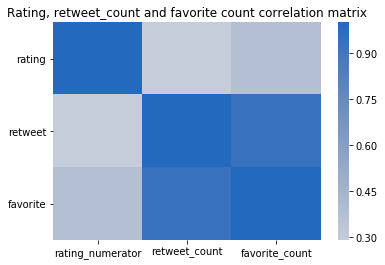

In [353]:
ax = sb.heatmap(corr_3, cmap = 'vlag_r', center = 0)
b,t = plt.ylim()
plt.yticks((0.5,1.5,2.5),('rating', 'retweet', 'favorite'))
plt.yticks(rotation = 0)
plt.ylim(b+0.5, t-0.5)
plt.title('Rating, retweet_count and favorite count correlation matrix');


Owner's rating is moderately correlated with both retweet_count and favorite_count. Retweet_count and favorite_count are highly correlated. All the correlations are positive.

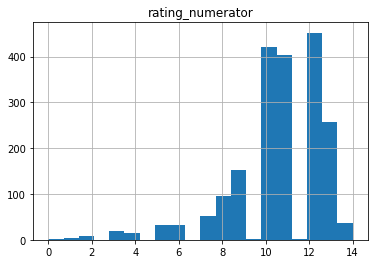

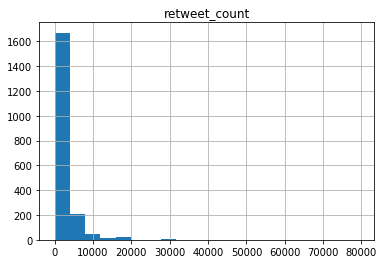

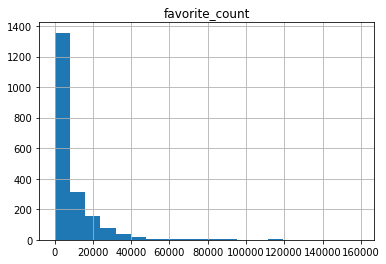

In [354]:
#first plot them indivicually
for metric in metrics_3:
    df.hist(column = metric, bins = 20 )

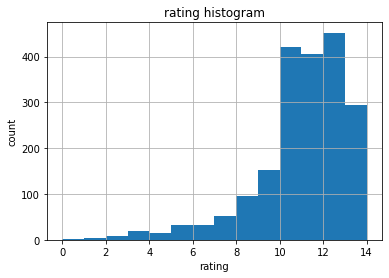

In [355]:
#adjust plots
df.hist('rating_numerator', bins = 14)
plt.xlabel('rating')
plt.ylabel('count')
plt.title('rating histogram');

The owner's ratings follow a left-skewed distribution, while majority ranges from 10 to 14.

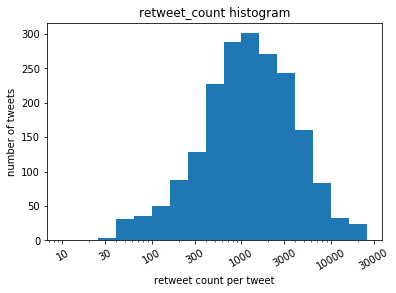

In [356]:
t_bins = 10**np.arange(1, 4.51, 0.2)
x_tks = [ 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.hist(df['retweet_count'], bins = t_bins )
plt.title('retweet_count histogram')
plt.xlabel('retweet count per tweet')
plt.ylabel('number of tweets')
plt.xscale('log')
plt.xticks(x_tks, x_tks, rotation = 30);


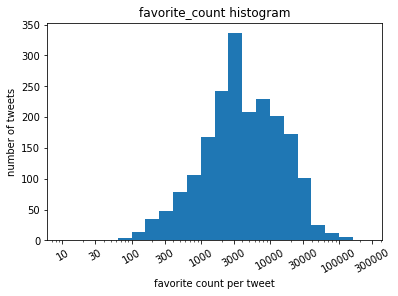

In [357]:
f_bins = 10**np.arange(1, 5.51, 0.2)
f_tks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
plt.hist(df['favorite_count'], bins = f_bins )
plt.title('favorite_count histogram')
plt.xlabel('favorite count per tweet')
plt.ylabel('number of tweets')
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30);


Retweet_count and favorite_count both follow log-normal-like distributions. Retweet_count distribution peaks between 1000~2000, while favorite_count distribution peaks at around 3000.

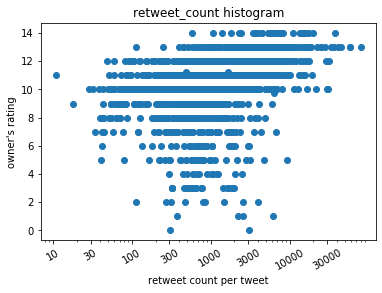

In [358]:
plt.scatter(data = df, x = 'retweet_count', y = 'rating_numerator')
plt.title('retweet_count histogram')
plt.xlabel('retweet count per tweet')
plt.ylabel("owner's rating")
plt.xscale('log')
plt.xticks(x_tks, x_tks, rotation = 30);


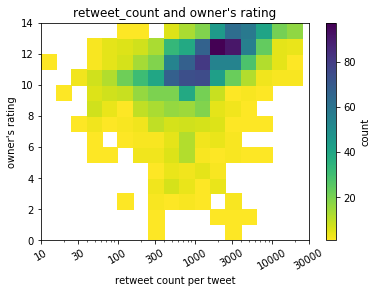

In [359]:
plt.hist2d(data = df, x = 'retweet_count', y = 'rating_numerator', bins = [t_bins, np.arange(15)],
           cmap = 'viridis_r', cmin = 0.5)
plt.title("retweet_count and owner's rating")
plt.xlabel('retweet count per tweet')
plt.ylabel("owner's rating")
plt.xscale('log')
plt.colorbar(label = 'count')
plt.xticks(x_tks, x_tks, rotation = 30);


Owner's rating is moderately positively correlated with retweet_count.

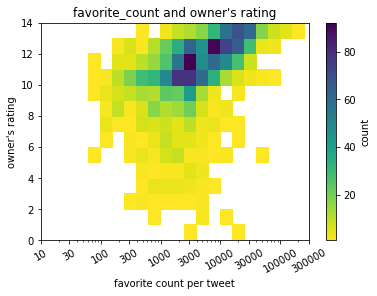

In [360]:
plt.hist2d(data = df, x = 'favorite_count', y = 'rating_numerator', bins = [f_bins, np.arange(15)],
           cmap = 'viridis_r', cmin = 0.5)
plt.title("favorite_count and owner's rating" )
plt.xlabel('favorite count per tweet')
plt.ylabel("owner's rating")
plt.colorbar(label = 'count')
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30);


Owner's rating is moderately correlated with favorite_count.

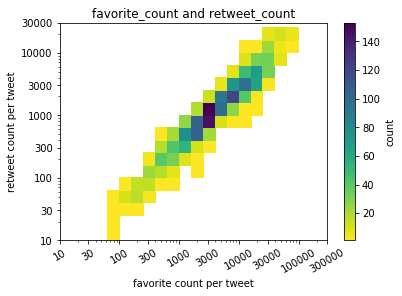

In [361]:
plt.hist2d(data = df, x = 'favorite_count', y = 'retweet_count', bins = [f_bins, t_bins],
           cmap = 'viridis_r', cmin = 0.5)
plt.title("favorite_count and retweet_count" )
plt.xlabel('favorite count per tweet')
plt.ylabel("retweet count per tweet")
plt.colorbar(label = 'count')
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30)
plt.yscale('log')
plt.yticks(x_tks, x_tks);


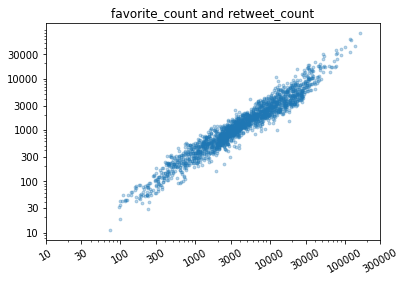

In [362]:
plt.scatter(data = df, x = 'favorite_count', y = 'retweet_count' ,alpha = 0.3,s =8)
plt.title("favorite_count and retweet_count" )
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30)
plt.yscale('log')
plt.yticks(x_tks, x_tks);


Retweet_count is strongly correlated with favorite_count.

## Dog Breed Prediction and Popularity 

Focus on the 1st prediction: p1.

In [363]:
df.p.value_counts().head(20)

golden_retriever             143
Labrador_retriever            96
Pembroke                      90
Chihuahua                     80
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    39
toy_poodle                    37
malamute                      30
cocker_spaniel                26
French_bulldog                26
Chesapeake_Bay_retriever      25
German_shepherd               21
miniature_pinscher            20
Siberian_husky                19
Staffordshire_bullterrier     18
Shih-Tzu                      18
Eskimo_dog                    18
beagle                        17
Name: p, dtype: int64

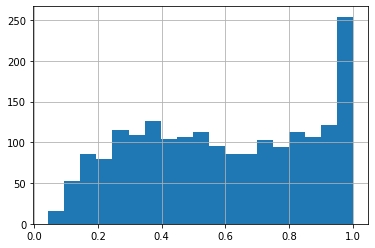

In [405]:
df.p1_conf.hist(bins = 19);

In [365]:
top_10_b = list(df.p.value_counts().head(10).index)
top_10_b

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'Pomeranian',
 'toy_poodle',
 'malamute']

In [366]:
top_df = df[df.p.isin(top_10_b)].copy()

In [367]:
breed_t = pd.api.types.CategoricalDtype(categories = top_10_b, ordered = True)
top_df.p = top_df.p.astype(breed_t)

In [384]:
#top_10_b_2 = list(map(lambda x: x.replace('_',' '), top_10_b)) works, too
top_10_b_2 = [x.replace('_',' ') for x in top_10_b]

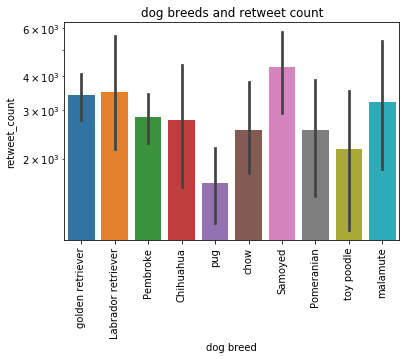

In [385]:
ax = sb.barplot(data = top_df, x = 'p', y = 'retweet_count')
ax.set_xticklabels(top_10_b_2, rotation = 90)
plt.xlabel('dog breed')
plt.yscale('log')
plt.title('dog breeds and retweet count');

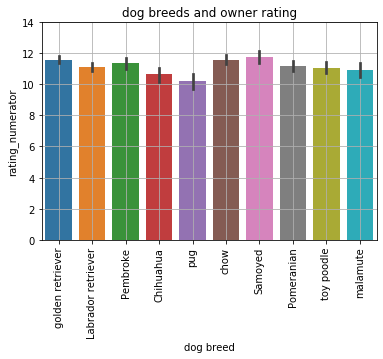

In [372]:
ax = sb.barplot(data = top_df, x = 'p', y = 'rating_numerator')
ax.set_xticklabels(top_10_b_2, rotation = 90)
plt.ylim([0,14])
plt.grid('True')
plt.xlabel('dog breed')
plt.title('dog breeds and owner rating');

Samoyed is the most highly rated breed for owners, and also most retweeted breed among tweeters.

In [373]:
top_df[top_df.p1 == 'Samoyed'].rating_numerator.mean()

11.743589743589743

In [374]:
top_df[top_df.p1 == 'golden_retriever'].rating_numerator.mean()

11.583941605839415

In [375]:
top_df[top_df.p1 == 'pug'].rating_numerator.mean()

10.24074074074074

In [376]:
df.to_csv('tweeter_archive_master.csv', index = False)